In [8]:
from os import getcwd, system
import matplotlib.pyplot as plt
import pandas as pd

END = 1667069321798  # datetime.datetime(2022, 10, 29, 14:48:41,790)
START = END - 50 * 60 * 1000

# Explosion at 14:16:39
EXPLOSION = END - (48 - 16) * 60 * 1000
EXPLOSION = EXPLOSION * 1e-3

# Want line 6901003

print(getcwd())
data = pd.read_csv("/home/matt/Documents/pyqt_groundstation/logs/10-29-2022_09-51-13/PROP_DATA_0 (copy).txt")

# print(data)
# data = data[data["timeStamp"] > START]
# print("================================")
time = data["timeStamp"] * 1e-3

# time = time - time[0]
# EXPLOSION = EXPLOSION - time[0]

/home/matt/Documents/pyqt_groundstation/src/Postprocessing


In [37]:
import numpy as np

# time_fire = (data["engineSequence"] == "FIRE_3")
ALL_FIRE_DATA = data[(data["engineSequence"] == "FIRE_3s")]
first_fire_timestamp = ALL_FIRE_DATA["timeStamp"].iloc[0] / 1000
print(first_fire_timestamp)

mean_dt = np.mean(np.diff(ALL_FIRE_DATA["timeStamp"]))
print(f"Datarate (hz): {1000 / mean_dt}")


def show_fire_start():
    plt.axvline(first_fire_timestamp, linestyle="--", color="k")

1667067406.828
Datarate (hz): 415.2744630071599


In [ ]:
# now that we have data, we can do things with it. waow
# timeStamp,currentState,engineSequence,loadCell,kerInletDucer,kerPintleDucer,kerRegDucer,kerTankDucer,kerVenturi,loxInletDucer,loxRegDucer,loxTankDucer,loxVenturi,n2pressDucer,pneumaticDucer,purgeDucer,
# boardTemp,kerInletTC,kerOutletTC,loxTankTC,miscTC,kerFlow,kerPressurant,kerPurge,kerVent,loxFlow,loxPressurant,loxPurge,loxVent

plt.figure()
for column in data.keys():
    if column.endswith("Ducer") or column.endswith("TC") or True:
        plt.figure()
        plt.title(column)
        plt.plot(time, data[column])

plt.show()

/home/matt/Documents/pyqt_groundstation/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


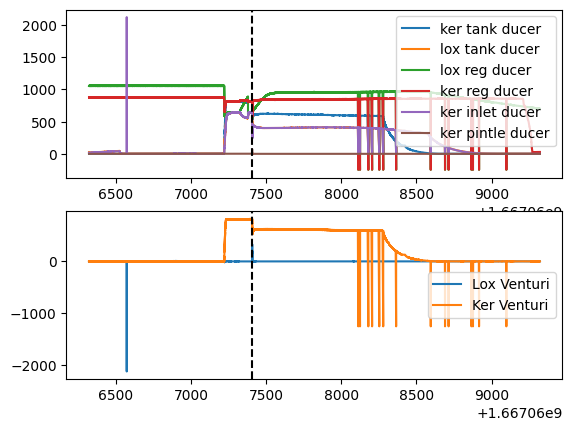

In [34]:
plt.figure()

plt.subplot(211)
plt.plot(time, data["kerTankDucer"], label="ker tank ducer")
plt.plot(time, data["loxTankDucer"], label="lox tank ducer")
plt.plot(time, data["loxRegDucer"], label="lox reg ducer")
plt.plot(time, data["kerRegDucer"], label="ker reg ducer")
plt.plot(time, data["kerInletDucer"], label="ker inlet ducer")
plt.plot(time, data["kerPintleDucer"], label="ker pintle ducer")
show_fire_start()
plt.legend()

plt.subplot(212)
# plt.plot(time, data["lVadCell"], label="load cell, lb")
plt.plot(time, data["loxVenturi"], label="Lox Venturi")
plt.plot(time, data["kerVenturi"], label="Ker Venturi")
plt.legend()
show_fire_start()


plt.show()

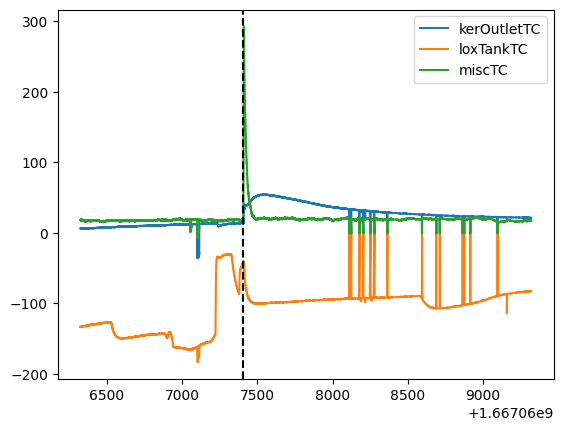

In [33]:
plt.figure()
for column in data.keys():
    if column.endswith("TC") and column != "kerInletTC":
        plt.plot(time, data[column], label=column)
plt.legend()

show_fire_start()

plt.show()